# Multilayer Perceptrons in PyTorch

In [1]:
# import PyTorch and its related packages
import torch as T
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# set default device based on CUDA's availability
device = 'cuda' if T.cuda.is_available() else 'cpu'
device

'cuda'

## Prepare CIFAR10 dataset

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
image_size = (32, 32, 3)

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = T.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = T.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Define the model with *nn.Module*

In [3]:
n_in = image_size[0] * image_size[1] * image_size[2]
n_h1 = 512
n_o = 10

class MultilayerPerceptron(nn.Module):
    def __init__(self, **kwargs):
        super(MultilayerPerceptron, self).__init__(**kwargs)
        self.dense_1 = T.nn.Linear(n_in, n_h1)
        self.dense_2 = T.nn.Linear(n_h1, n_o)
        
    def forward(self, x):
        x = x.view(-1, n_in)
        x = F.relu(self.dense_1(x))
        x = self.dense_2(x)
        return x

In [4]:
net = MultilayerPerceptron()
net.to(device)

MultilayerPerceptron(
  (dense_1): Linear(in_features=3072, out_features=512, bias=True)
  (dense_2): Linear(in_features=512, out_features=10, bias=True)
)

## Setup the loss function and optimizer

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training and Evaluation

In [6]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(25):  # loop over the dataset multiple times
    print()
    running_loss = .0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        if device == 'cuda':
            inputs, labels = inputs.to(device), labels.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = T.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    running_loss /= len(train_loader)
    train_loss.append(running_loss)
    running_acc = correct / total
    train_acc.append(running_acc)
    print('Train Acc. => {}%'.format(100 * running_acc), end=' | ')
    print('Train Loss => {}'.format(running_loss))
    
    # evaluate on the test set
    # note this is usually performed on the validation set
    # for simplicity we just evaluate it on the test set
    with T.no_grad():
        correct = 0
        total = 0
        test_running_loss = .0
        for data in test_loader:
            inputs, labels = data
            if device == 'cuda':
                inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = T.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_running_loss /= len(test_loader)
        test_loss.append(test_running_loss)
        test_running_acc = correct / total
        test_acc.append(test_running_acc)
        print('Test Acc. => {}%'.format(100 * test_running_acc), end=' | ')
        print('Test Loss => {}'.format(test_running_loss))

print('Finished Training')


Train Acc. => 37.95% | Train Loss => 1.7816222381378242
Test Acc. => 43.88% | Test Loss => 1.6125088735891226

Train Acc. => 45.660000000000004% | Train Loss => 1.561247192127767
Test Acc. => 46.56% | Test Loss => 1.5234629932683879

Train Acc. => 48.84% | Train Loss => 1.472550394438965
Test Acc. => 48.97% | Test Loss => 1.4607626260659945

Train Acc. => 51.42% | Train Loss => 1.403921784190741
Test Acc. => 50.43% | Test Loss => 1.421202297599171

Train Acc. => 53.576% | Train Loss => 1.34633101173036
Test Acc. => 51.28% | Test Loss => 1.3943746840230191

Train Acc. => 55.202% | Train Loss => 1.2966642157435035
Test Acc. => 51.74999999999999% | Test Loss => 1.3719569400857432

Train Acc. => 57.02% | Train Loss => 1.2531221616519848
Test Acc. => 52.459999999999994% | Test Loss => 1.355332904539931

Train Acc. => 58.314% | Train Loss => 1.2115807342590312
Test Acc. => 52.629999999999995% | Test Loss => 1.3406628831126057

Train Acc. => 59.718% | Train Loss => 1.1755349053378603
Test Ac

In [7]:
import matplotlib.pyplot as plt

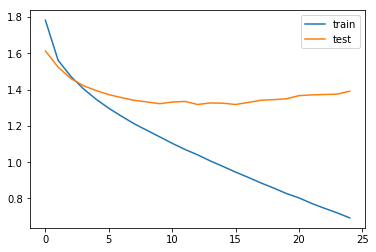

In [8]:
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()

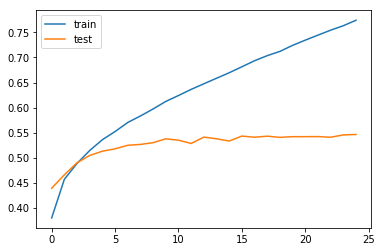

In [9]:
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.legend()
plt.show()